<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/Analise_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>

<center>

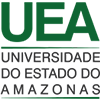

</center>

---

## <center>Código fonte do TCC: Análise dos dados de todos biomas do período de 2019 até 2021</center>
##### <center>**Orientadora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparação do Ambiente

---



In [2]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 11.9 MB/s 
     |████████████████████████████████| 6.3 MB 27.5 MB/s 
     |████████████████████████████████| 16.7 MB 365 kB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 162 kB 12.0 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 1.0 MB 35.3 MB/s 
     |████████████████████████████████| 2.3 MB 49.6 MB/s 
     |████████████████████████████████| 51 kB 236 kB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 53.3 MB/s 
     |████████████████████████████████| 5.8 MB 42.2 MB/s 
     |████████████████████████████████| 251 kB 48.8 MB/s 
     |████████████████████████████████| 127 kB 50.3 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=7f1c667468fff30e401783c086d836f71338a4f146cc0c587926eafa60ee792c
  Stored in directory: /root/.cache/pip/whe

In [3]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [159]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
# # Criando os DataFrames de focos de queimadas do Brasil
alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/focos_biomas_2019-01-01_2019-12-31.csv') 

In [161]:
alertas_2019

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2,1.6,0.5,-3.602,-49.963,201.6
1,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.630,-52.255,47.5
2,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.631,-52.264,17.4
3,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.642,-52.265,12.4
4,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0,0.3,0.0,-3.651,-58.254,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
197627,2019/10/26 16:20:00,AQUA_M-T,Brasil,MARANHAO,GRAJAU,Cerrado,4,0.0,0.8,-5.877,-45.906,25.5
197628,2019/10/26 16:20:00,AQUA_M-T,Brasil,TOCANTINS,SAO BENTO DO TOCANTINS,Cerrado,0,0.0,0.2,-5.974,-48.031,68.2
197629,2019/10/26 16:20:00,AQUA_M-T,Brasil,TOCANTINS,SAO BENTO DO TOCANTINS,Cerrado,0,0.0,0.3,-5.978,-48.013,40.2
197630,2019/10/26 17:55:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,AQUIDAUANA,Pantanal,4,0.0,0.9,-19.775,-55.908,72.5


## Preparação do DataFrame com os trimestres do ano de 2019 do Bioma Amazônia

Aqui podem ser feitas os filtros para outros Biomas ou períodos. Ou ainda fitrar por outros atributos, como por exemplo um Município específico.

PS.: Caso se mude o período é necessário mudar o nome das variáveis e DataFrames para nomes mais condizentes com o novo conteúdo.

---



In [163]:
alertas_2019.datahora = pd.to_datetime(alertas_2019.datahora) #, format="%d/%m/%Y"

In [164]:
df_amazonia_2019_trim1=alertas_2019[(alertas_2019.datahora>='2019-01-01')& (alertas_2019.datahora<='2019-03-31')&(alertas_2019.bioma=='Amazonia')]
df_amazonia_2019_trim2=alertas_2019[(alertas_2019.datahora>='2019-04-01')& (alertas_2019.datahora<='2019-06-30')&(alertas_2019.bioma=='Amazonia')]
df_amazonia_2019_trim3=alertas_2019[(alertas_2019.datahora>='2019-07-01')& (alertas_2019.datahora<='2019-09-30')&(alertas_2019.bioma=='Amazonia')]
df_amazonia_2019_trim4=alertas_2019[(alertas_2019.datahora>='2019-10-01')& (alertas_2019.datahora<='2019-12-31')&(alertas_2019.bioma=='Amazonia')]

In [165]:
#df_amazonia_2019_trim1
#df_amazonia_2019_trim2
#df_amazonia_2019_trim3
df_amazonia_2019_trim4

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019-10-27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2,1.6,0.5,-3.602,-49.963,201.6
1,2019-10-27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.630,-52.255,47.5
2,2019-10-27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.631,-52.264,17.4
3,2019-10-27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.642,-52.265,12.4
4,2019-10-27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0,0.3,0.0,-3.651,-58.254,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,2019-10-26 16:20:00,AQUA_M-T,Brasil,PARA,PARAGOMINAS,Amazonia,0,0.1,0.5,-3.022,-46.953,28.4
197621,2019-10-26 16:20:00,AQUA_M-T,Brasil,PARA,PORTEL,Amazonia,2,9.7,0.1,-3.043,-51.105,75.8
197622,2019-10-26 16:20:00,AQUA_M-T,Brasil,PARA,PORTEL,Amazonia,2,9.8,0.1,-3.049,-51.097,62.0
197624,2019-10-26 16:20:00,AQUA_M-T,Brasil,PARA,MARABA,Amazonia,0,0.2,0.1,-5.855,-49.451,57.0


## **Criação o GeoDataFrame e Sistema de Referência de Coordenadas**

---



In [166]:
geometrytrim1 = [Point(xy) for xy in zip(df_amazonia_2019_trim1['longitude'], df_amazonia_2019_trim1['latitude'])]
geometrytrim2 = [Point(xy) for xy in zip(df_amazonia_2019_trim2['longitude'], df_amazonia_2019_trim2['latitude'])]
geometrytrim3 = [Point(xy) for xy in zip(df_amazonia_2019_trim3['longitude'], df_amazonia_2019_trim3['latitude'])]
geometrytrim4 = [Point(xy) for xy in zip(df_amazonia_2019_trim4['longitude'], df_amazonia_2019_trim4['latitude'])]

In [167]:
geodf_amazonia_2019_trim1 = gpd.GeoDataFrame(df_amazonia_2019_trim1, crs='EPSG:4326', geometry=geometrytrim1)
geodf_amazonia_2019_trim2 = gpd.GeoDataFrame(df_amazonia_2019_trim2, crs='EPSG:4326', geometry=geometrytrim2)
geodf_amazonia_2019_trim3 = gpd.GeoDataFrame(df_amazonia_2019_trim3, crs='EPSG:4326', geometry=geometrytrim3)
geodf_amazonia_2019_trim4 = gpd.GeoDataFrame(df_amazonia_2019_trim4, crs='EPSG:4326', geometry=geometrytrim4)

In [168]:
type(geodf_amazonia_2019_trim1)
#type(geodf_amazonia_2019_trim2)
#type(geodf_amazonia_2019_trim3)
#type(geodf_amazonia_2019_trim4)

geopandas.geodataframe.GeoDataFrame

In [169]:
geodf_amazonia_2019_trim1

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
304,2019-01-05 17:00:00,AQUA_M-T,Brasil,PARA,MOJU,Amazonia,0,0.4,0.0,-2.194,-48.728,7.2,POINT (-48.72800 -2.19400)
305,2019-01-05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0,0.5,0.4,-2.185,-53.864,26.8,POINT (-53.86400 -2.18500)
306,2019-01-05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0,0.2,0.4,-2.170,-53.687,15.7,POINT (-53.68700 -2.17000)
307,2019-01-05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0,0.3,0.4,-2.162,-53.700,42.3,POINT (-53.70000 -2.16200)
308,2019-01-05 17:00:00,AQUA_M-T,Brasil,PARA,ORIXIMINA,Amazonia,5,0.4,0.0,-1.487,-56.108,14.6,POINT (-56.10800 -1.48700)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196718,2019-03-22 17:20:00,AQUA_M-T,Brasil,MATO GROSSO,COLNIZA,Amazonia,0,6.4,0.0,-9.146,-61.425,82.0,POINT (-61.42500 -9.14600)
196719,2019-03-22 17:20:00,AQUA_M-T,Brasil,MATO GROSSO,COLNIZA,Amazonia,0,6.5,0.0,-9.150,-61.418,79.4,POINT (-61.41800 -9.15000)
196723,2019-03-28 16:45:00,AQUA_M-T,Brasil,MATO GROSSO,GAUCHA DO NORTE,Amazonia,2,6.9,0.0,-13.306,-53.956,22.7,POINT (-53.95600 -13.30600)
197540,2019-01-02 18:05:00,AQUA_M-T,Brasil,AMAZONAS,SAO GABRIEL DA CACHOEIRA,Amazonia,7,0.0,-999.0,0.911,-67.178,19.0,POINT (-67.17800 0.91100)


In [170]:
geodf_amazonia_2019_trim1 = geodf_amazonia_2019_trim1.to_crs(crs='EPSG:3857')
geodf_amazonia_2019_trim2 = geodf_amazonia_2019_trim2.to_crs(crs='EPSG:3857')
geodf_amazonia_2019_trim3 = geodf_amazonia_2019_trim3.to_crs(crs='EPSG:3857')
geodf_amazonia_2019_trim4 = geodf_amazonia_2019_trim4.to_crs(crs='EPSG:3857')

In [171]:
geodf_amazonia_2019_trim1.crs.to_string()
geodf_amazonia_2019_trim2.crs.to_string()
geodf_amazonia_2019_trim3.crs.to_string()
geodf_amazonia_2019_trim4.crs.to_string()

'EPSG:3857'

## **Geração dos gráficos de quantitativos e localização dos focos por Biomas**

In [172]:
geodf_amazonia_2019_trim1['estado'].unique()
geodf_amazonia_2019_trim2['estado'].unique()
geodf_amazonia_2019_trim3['estado'].unique()
geodf_amazonia_2019_trim4['estado'].unique()

array(['PARA', 'AMAZONAS', 'MATO GROSSO', 'MARANHAO', 'RONDONIA',
       'TOCANTINS', 'RORAIMA', 'AMAPA', 'ACRE'], dtype=object)

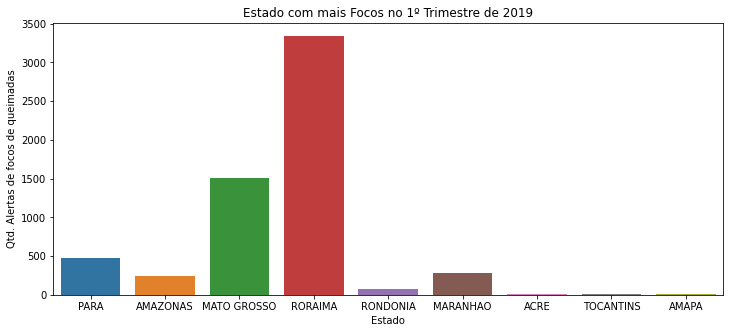

In [175]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='estado', data=geodf_amazonia_2019_trim1)
ax.set_title("Estado com mais Focos no 1º Trimestre de 2019")

#ax = sns.countplot(x='estado', data=geodf_amazonia_2019_trim2)
#ax.set_title("Estado com mais Focos no 2º Trimestre de 2019")

#ax = sns.countplot(x='estado', data=geodf_amazonia_2019_trim3)
#ax.set_title("Estado com mais Focos no 3º Trimestre de 2019")

#ax = sns.countplot(x='estado', data=geodf_amazonia_2019_trim4)
#ax.set_title("Estado com mais Focos no 4º Trimestre de 2019")

ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. Alertas de focos de queimadas')
plt.show()

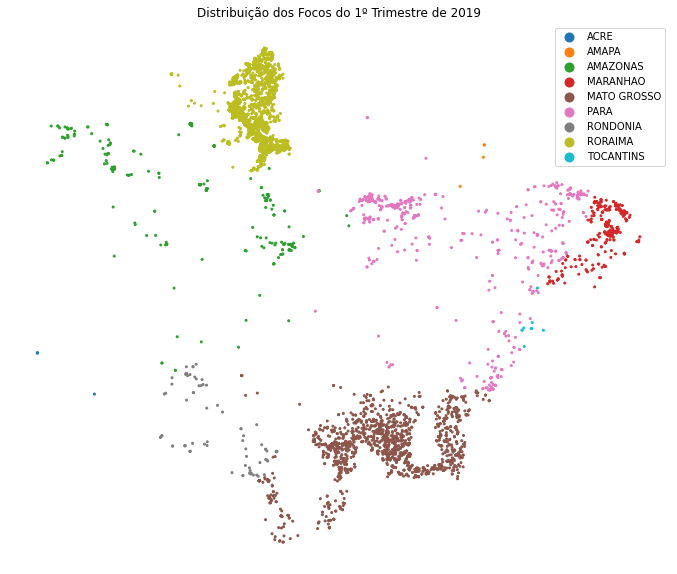

In [176]:
ax = geodf_amazonia_2019_trim1.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
ax.set_title("Distribuição dos Focos do 1º Trimestre de 2019")

#ax = geodf_amazonia_2019_trim2.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
#ax.set_title("Distribuição dos Focos do 2º Trimestre de 2019")

#ax = geodf_amazonia_2019_trim3.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
#ax.set_title("Distribuição dos Focos do 3º Trimestre de 2019")

#ax = geodf_amazonia_2019_trim4.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
#ax.set_title("Distribuição dos Focos do 4º Trimestre de 2019")

ax.set_axis_off()
#contextily.add_basemap(ax)
plt.show()

**DataFrame Pré-Processado**

In [177]:
coord_trim1 = geodf_amazonia_2019_trim1.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
coord_trim2 = geodf_amazonia_2019_trim2.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
coord_trim3 = geodf_amazonia_2019_trim3.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
coord_trim4 = geodf_amazonia_2019_trim4.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [178]:
#coord_trim1
coord_trim2
#coord_trim3
#coord_trim4

,latitude,longitude
212,-3.514,-55.422
213,-3.312,-59.571
214,-9.673,-62.920
215,-9.422,-62.405
561,0.543,-60.713
...,...,...
196944,-3.929,-54.281
196945,-4.052,-55.339
196946,-4.053,-55.348
196947,-4.258,-56.208


## **Aplicação dos Algoritmos para os Biomas**


*   K-Means

In [179]:
agrupadorK_trim1 = KMeans(n_clusters=9)
agrupadorK_trim2 = KMeans(n_clusters=9)
agrupadorK_trim3 = KMeans(n_clusters=9)
agrupadorK_trim4 = KMeans(n_clusters=9)

In [180]:
agrupadorK_trim1.fit(coord_trim1)
agrupadorK_trim2.fit(coord_trim2)
agrupadorK_trim3.fit(coord_trim3)
agrupadorK_trim4.fit(coord_trim4)

KMeans(n_clusters=9)

In [181]:
agrupadorK_trim1.labels_
agrupadorK_trim2.labels_
agrupadorK_trim3.labels_
agrupadorK_trim4.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [182]:
np.unique(agrupadorK_trim1.labels_)
np.unique(agrupadorK_trim2.labels_)
np.unique(agrupadorK_trim3.labels_)
np.unique(agrupadorK_trim4.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [183]:
coord_trim1['Grupo'] = agrupadorK_trim1.labels_
coord_trim2['Grupo'] = agrupadorK_trim2.labels_
coord_trim3['Grupo'] = agrupadorK_trim3.labels_
coord_trim4['Grupo'] = agrupadorK_trim4.labels_

In [184]:
coord_trim1

,latitude,longitude,Grupo
304,-2.194,-48.728,2
305,-2.185,-53.864,5
306,-2.170,-53.687,5
307,-2.162,-53.700,5
308,-1.487,-56.108,5
...,...,...,...
196718,-9.146,-61.425,4
196719,-9.150,-61.418,4
196723,-13.306,-53.956,1
197540,0.911,-67.178,7


**Gráfico do Cluster por Trimestre**

In [190]:
'''
c0lat = coord_trim1[coord_trim1['Grupo']==0]['latitude']
c0lon = coord_trim1[coord_trim1['Grupo']==0]['longitude']
c1lat = coord_trim1[coord_trim1['Grupo']==1]['latitude']
c1lon = coord_trim1[coord_trim1['Grupo']==1]['longitude']
c2lat = coord_trim1[coord_trim1['Grupo']==2]['latitude']
c2lon = coord_trim1[coord_trim1['Grupo']==2]['longitude']
c3lat = coord_trim1[coord_trim1['Grupo']==3]['latitude']
c3lon = coord_trim1[coord_trim1['Grupo']==3]['longitude']
c4lat = coord_trim1[coord_trim1['Grupo']==4]['latitude']
c4lon = coord_trim1[coord_trim1['Grupo']==4]['longitude']
c5lat = coord_trim1[coord_trim1['Grupo']==5]['latitude']
c5lon = coord_trim1[coord_trim1['Grupo']==5]['longitude']
c6lat = coord_trim1[coord_trim1['Grupo']==6]['latitude']
c6lon = coord_trim1[coord_trim1['Grupo']==6]['longitude']
c7lat = coord_trim1[coord_trim1['Grupo']==7]['latitude']
c7lon = coord_trim1[coord_trim1['Grupo']==7]['longitude']
c8lat = coord_trim1[coord_trim1['Grupo']==8]['latitude']
c8lon = coord_trim1[coord_trim1['Grupo']==8]['longitude']
'''

'''
c0lat = coord_trim2[coord_trim2['Grupo']==0]['latitude']
c0lon = coord_trim2[coord_trim2['Grupo']==0]['longitude']
c1lat = coord_trim2[coord_trim2['Grupo']==1]['latitude']
c1lon = coord_trim2[coord_trim2['Grupo']==1]['longitude']
c2lat = coord_trim2[coord_trim2['Grupo']==2]['latitude']
c2lon = coord_trim2[coord_trim2['Grupo']==2]['longitude']
c3lat = coord_trim2[coord_trim2['Grupo']==3]['latitude']
c3lon = coord_trim2[coord_trim2['Grupo']==3]['longitude']
c4lat = coord_trim2[coord_trim2['Grupo']==4]['latitude']
c4lon = coord_trim2[coord_trim2['Grupo']==4]['longitude']
c5lat = coord_trim2[coord_trim2['Grupo']==5]['latitude']
c5lon = coord_trim2[coord_trim2['Grupo']==5]['longitude']
c6lat = coord_trim2[coord_trim2['Grupo']==6]['latitude']
c6lon = coord_trim2[coord_trim2['Grupo']==6]['longitude']
c7lat = coord_trim2[coord_trim2['Grupo']==7]['latitude']
c7lon = coord_trim2[coord_trim2['Grupo']==7]['longitude']
c8lat = coord_trim2[coord_trim2['Grupo']==8]['latitude']
c8lon = coord_trim2[coord_trim2['Grupo']==8]['longitude']
'''

'''
c0lat = coord_trim3[coord_trim3['Grupo']==0]['latitude']
c0lon = coord_trim3[coord_trim3['Grupo']==0]['longitude']
c1lat = coord_trim3[coord_trim3['Grupo']==1]['latitude']
c1lon = coord_trim3[coord_trim3['Grupo']==1]['longitude']
c2lat = coord_trim3[coord_trim3['Grupo']==2]['latitude']
c2lon = coord_trim3[coord_trim3['Grupo']==2]['longitude']
c3lat = coord_trim3[coord_trim3['Grupo']==3]['latitude']
c3lon = coord_trim3[coord_trim3['Grupo']==3]['longitude']
c4lat = coord_trim3[coord_trim3['Grupo']==4]['latitude']
c4lon = coord_trim3[coord_trim3['Grupo']==4]['longitude']
c5lat = coord_trim3[coord_trim3['Grupo']==5]['latitude']
c5lon = coord_trim3[coord_trim3['Grupo']==5]['longitude']
c6lat = coord_trim3[coord_trim3['Grupo']==6]['latitude']
c6lon = coord_trim3[coord_trim3['Grupo']==6]['longitude']
c7lat = coord_trim3[coord_trim3['Grupo']==7]['latitude']
c7lon = coord_trim3[coord_trim3['Grupo']==7]['longitude']
c8lat = coord_trim3[coord_trim3['Grupo']==8]['latitude']
c8lon = coord_trim3[coord_trim3['Grupo']==8]['longitude']
'''

#'''
c0lat = coord_trim4[coord_trim4['Grupo']==0]['latitude']
c0lon = coord_trim4[coord_trim4['Grupo']==0]['longitude']
c1lat = coord_trim4[coord_trim4['Grupo']==1]['latitude']
c1lon = coord_trim4[coord_trim4['Grupo']==1]['longitude']
c2lat = coord_trim4[coord_trim4['Grupo']==2]['latitude']
c2lon = coord_trim4[coord_trim4['Grupo']==2]['longitude']
c3lat = coord_trim4[coord_trim4['Grupo']==3]['latitude']
c3lon = coord_trim4[coord_trim4['Grupo']==3]['longitude']
c4lat = coord_trim4[coord_trim4['Grupo']==4]['latitude']
c4lon = coord_trim4[coord_trim4['Grupo']==4]['longitude']
c5lat = coord_trim4[coord_trim4['Grupo']==5]['latitude']
c5lon = coord_trim4[coord_trim4['Grupo']==5]['longitude']
c6lat = coord_trim4[coord_trim4['Grupo']==6]['latitude']
c6lon = coord_trim4[coord_trim4['Grupo']==6]['longitude']
c7lat = coord_trim4[coord_trim4['Grupo']==7]['latitude']
c7lon = coord_trim4[coord_trim4['Grupo']==7]['longitude']
c8lat = coord_trim4[coord_trim4['Grupo']==8]['latitude']
c8lon = coord_trim4[coord_trim4['Grupo']==8]['longitude']
#'''

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon
x6 = c6lat
y6 = c6lon
x7 = c7lat
y7 = c7lon
x8 = c8lat
y8 = c8lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

fig.add_trace(
    go.Scatter(
        x=x6,
        y=y6,
        mode="markers",
        marker=dict(color="chartreuse")
    )
)

fig.add_trace(
    go.Scatter(
        x=x7,
        y=y7,
        mode="markers",
        marker=dict(color="chocolate")
    )
)

fig.add_trace(
    go.Scatter(
        x=x8,
        y=y8,
        mode="markers",
        marker=dict(color="red")
    )
)


# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]
cluster6 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x6), y0=min(y6),
                            x1=max(x6), y1=max(y6),
                            line=dict(color="chartreuse"))]
cluster7 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x7), y0=min(y7),
                            x1=max(x7), y1=max(y7),
                            line=dict(color="chocolate"))]
cluster8 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x8), y0=min(y8),
                            x1=max(x8), y1=max(y8),
                            line=dict(color="red"))]
fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="Cluster 6",
                 method="relayout",
                 args=["shapes", cluster6]),
            dict(label="Cluster 7",
                 method="relayout",
                 args=["shapes", cluster7]),
            dict(label="Cluster 8",
                 method="relayout",
                 args=["shapes", cluster8]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5 + cluster6 + cluster7 + cluster8])
        ]),
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Clusters com as coordenadas do 1º Trimestre de 2019",
    #title_text="Clusters com as coordenadas do 2º Trimestre de 2019",
    #title_text="Clusters com as coordenadas do 3º Trimestre de 2019",
    #title_text="Clusters com as coordenadas do 4º Trimestre de 2019",
    showlegend=False,
)
fig.show()